Assignment 2

Basic Text Processing


Task 1
For the few following task download the ADVENTURES OF HUCKLEBERRY FINN by running the code below and then read the text file into huckfinn variable.

In [3]:
with open("76-0.txt",'r',encoding="utf-8") as f:
    huckfinn = f.read()

Task 2
Print the Number of sentences in the text

In [6]:
import nltk

In [7]:
tokens = nltk.tokenize.sent_tokenize(huckfinn)


In [8]:
print(len(tokens))

4729


Task 3
Count the number of words in each sentences, and plot a distribution (histogram)

In [29]:
lst = []
for sentence in tokens:
    words = nltk.tokenize.word_tokenize(sentence)
    count = len(words)
    lst.append(count)
    

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

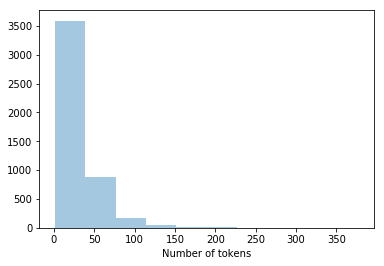

In [57]:
lst = pd.Series(lst, name="Number of tokens")
sns.distplot(lst, kde=False, bins=10)

Task 4
For each sentence count the number of punctuations used and print its distribution.

In [59]:
import string
lst1 = []
for sentence in tokens:
    words = nltk.tokenize.word_tokenize(sentence)
    count = 0
    for punc in words:
        if punc in string.punctuation :
            count += 1
    lst1.append(count)

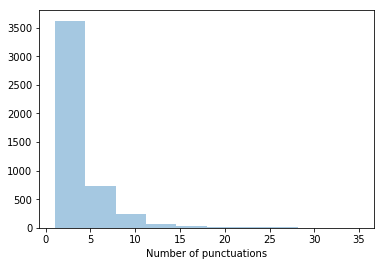

In [172]:
lst1 = pd.Series(lst1, name="Number of punctuations")
sns.distplot(lst1,kde=False,bins = 10)

Task 5
Identify the POS Tags [Nouns, Pronoun, Adjective, Verb, Adverb] in the whole text file and create a pie chart displaying the percentages of [Nouns, Pronoun, Adjective, Verb, Adverb]

In [11]:
import spacy

In [12]:
nlp = spacy.load('en_core_web_lg')


In [14]:
doc = nlp(huckfinn)

In [84]:
count_adj = 0
count_noun = 0
count_pro = 0
count_verb = 0
count_ad = 0
for x in doc:
    if x.pos_ == 'ADJ':
        count_adj += 1
    elif x.pos_ == 'NOUN':
        count_noun += 1
    elif x.pos_ == 'VERB':
        count_verb += 1
    elif x.pos_ == 'ADV':
        count_ad += 1
    elif x.pos_ == 'PRON':
        count_pro += 1

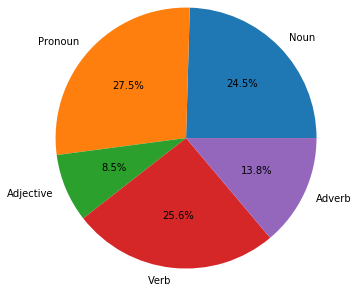

In [173]:
exp_values = [count_noun, count_pro, count_adj, count_verb, count_ad]
exp_labels = ['Noun', 'Pronoun', 'Adjective', 'Verb', 'Adverb']
plt.axix = 'equal'
plt.pie(exp_values, labels = exp_labels,autopct='%1.1f%%',radius=1.5)
plt.show()

Task 6
Download the movie reviews dataset running the following code and unzip it

In [17]:
import wget

In [ ]:
wget.download('http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz')

In [ ]:
import tarfile
tf = tarfile.open("review_polarity.tar.gz")
tf.extractall()

Task 7
If you have ran the above code succesfully, you might be able to see a folder txt_sentoken. Now inside this folder there will be two sub folders. One pos and another neg. Try to read all those reviews in to a dataframe with labels as positive and negative. And then print the head of Dataset.

In [18]:
import os
neg_files = [file for file in os.listdir(r'C:\Users\91706\txt_sentoken\neg') if os.path.isfile(os.path.join(r'C:\Users\91706\txt_sentoken\neg',
                                                                                        file))]
pos_files = [file for file in os.listdir(r'C:\Users\91706\txt_sentoken\pos') if os.path.isfile(os.path.join(r'C:\Users\91706\txt_sentoken\pos',
                                                                                        file))]

In [19]:
path = "C://Users//91706//txt_sentoken//pos"
path_neg = "C://Users//91706//txt_sentoken//neg"

In [20]:
master_p = []
master_n = []
for p_files in pos_files:
    with open(f'{path}/{p_files}', 'r') as file:
        data = file.readlines()
        master_p.append(data)
for n_files in neg_files:
    with open(f'{path_neg}/{n_files}', 'r') as file:
        data = file.readlines()
        master_n.append(data)

In [21]:
import pandas as pd

In [108]:
df = pd.DataFrame(data={'positive': master_p, 'negative': master_n})

In [109]:
df.head()

,positive,negative
0,[films adapted from comic books have had plent...,[plot : two teen couples go to a church party ...
1,[every now and then a movie comes along from a...,"[the happy bastard's quick movie review \n, da..."
2,[you've got mail works alot better than it des...,[it is movies like these that make a jaded mov...
3,"[ "" jaws "" is a rare film that grabs your atte...","[ "" quest for camelot "" is warner bros . ' fir..."
4,[moviemaking is a lot like being the general m...,[synopsis : a mentally unstable man undergoing...


Task 8
Now from the dataframe you created, convert all letter to lower case and print the head of Dataframe.

In [110]:
i = 0
for x in df['positive']:
    df.at[i,'positive'] = str(x).lower()
    i += 1
    

In [111]:
i = 0
for x in df['negative']:
    df.at[i,'negative'] = str(x).lower()
    i += 1

In [112]:
df.head()

,positive,negative
0,"[""films adapted from comic books have had plen...",['plot : two teen couples go to a church party...
1,"[""every now and then a movie comes along from ...","[""the happy bastard's quick movie review \n"", ..."
2,"[""you've got mail works alot better than it de...",['it is movies like these that make a jaded mo...
3,"[' "" jaws "" is a rare film that grabs your att...","[' "" quest for camelot "" is warner bros . \' f..."
4,"[""moviemaking is a lot like being the general ...","[""synopsis : a mentally unstable man undergoin..."


Task 9
From the reviews remove punctuation, like you did in the last assignment.

In [113]:
import string
i = 0
for x in df['positive']:
    for y in x:
        if y in string.punctuation:
            x = x.replace(y,"")
    df.at[i,'positive'] = x
    i += 1

In [115]:
i = 0
for x in df['negative']:
    for y in x:
        if y in string.punctuation:
            x = x.replace(y,"")
            #print(x)
    df.at[i,'negative'] = x
    i += 1

In [116]:
df.head()

,positive,negative
0,films adapted from comic books have had plenty...,plot two teen couples go to a church party d...
1,every now and then a movie comes along from a ...,the happy bastards quick movie review n damn t...
2,youve got mail works alot better than it deser...,it is movies like these that make a jaded movi...
3,jaws is a rare film that grabs your attenti...,quest for camelot is warner bros first fe...
4,moviemaking is a lot like being the general ma...,synopsis a mentally unstable man undergoing p...


Task 10
Tokenize the reviews text and print the head

In [117]:
i = 0
j = 0
for x in df['positive']:
    x = x.split()
    df.at[i,'positive'] = x
    i += 1
for y in df['negative']:
    y = y.split()
    df.at[j,'negative'] = y
    j += 1


In [118]:
df.head()

,positive,negative
0,"[films, adapted, from, comic, books, have, had...","[plot, two, teen, couples, go, to, a, church, ..."
1,"[every, now, and, then, a, movie, comes, along...","[the, happy, bastards, quick, movie, review, n..."
2,"[youve, got, mail, works, alot, better, than, ...","[it, is, movies, like, these, that, make, a, j..."
3,"[jaws, is, a, rare, film, that, grabs, your, a...","[quest, for, camelot, is, warner, bros, first,..."
4,"[moviemaking, is, a, lot, like, being, the, ge...","[synopsis, a, mentally, unstable, man, undergo..."


Task 11
Remove words that contain numbers

In [119]:
for x in df['positive']:
    for y in x:
        if y.isalpha() is False:
            x.remove(y)

for x in df['negative']:
    for y in x:
        if y.isalpha() is False:
            x.remove(y)

Task 12
Remove the empty tokens

In [120]:
for x in df['positive']:
    for y in x:
        if y == " ":
            x.remove(y)
for x in df['negative']:
    for y in x:
        if y == " ":
            x.remove(y)

In [121]:
df.head()

,positive,negative
0,"[films, adapted, from, comic, books, have, had...","[plot, two, teen, couples, go, to, a, church, ..."
1,"[every, now, and, then, a, movie, comes, along...","[the, happy, bastards, quick, movie, review, n..."
2,"[youve, got, mail, works, alot, better, than, ...","[it, is, movies, like, these, that, make, a, j..."
3,"[jaws, is, a, rare, film, that, grabs, your, a...","[quest, for, camelot, is, warner, bros, first,..."
4,"[moviemaking, is, a, lot, like, being, the, ge...","[synopsis, a, mentally, unstable, man, undergo..."


Task 13
Consider adjectives in the whole text. Apply Stemming technique using different types of stemming like Lanchester, Porter and Snowball and place it in a dataframe and compare different stemming techniques.

In [124]:
list_adj=[]
for x in range(len(df)):
    test = nlp(str(df.positive[x] + df.negative[x]))
    pos_adj = [token for token in test if token.pos_ == 'ADJ']
    list_adj += pos_adj
    if x % 50 == 0:
        print(x,'completed')

0 completed
50 completed
100 completed
150 completed
200 completed
250 completed
300 completed
350 completed
400 completed
450 completed
500 completed
550 completed
600 completed
650 completed
700 completed
750 completed
800 completed
850 completed
900 completed
950 completed


In [177]:
print(list_adj[:100])

[comic, arthouse, comic, whole, new, mid, little, odd, more, other, whole, comic, direct, ludicrous, better, direct, violent, mad, filthy, little, nervous, mysterious, surgical, first, stiff, enough, prophetic, copious, unfortunate, gruesome, other, unique, interesting, comic, vertical, good, funny, capable, such, ghastly, electric, dark, bleak, enough, surprising, much, more, sleepy, hollow, flashy, crazy, comic, original, creepy, solid, dreamy, strong, british, secret, great, big, first, bad, good, strong, cool, bad, harder, such, good, bad, neat, main, jumbled, normal, dead, dead, strange, looooot, weird, most, same, biggest, big, secret, final, thrilling, sad, figured, most, little, more, secret, plain, lazy, different, decent, little, more, good]


In [178]:
from nltk.stem import LancasterStemmer,PorterStemmer

In [179]:
lancaster = LancasterStemmer()

In [180]:
lancaster_stemming = ([lancaster.stem(str(x)) for x in list_adj])

In [181]:
porter = PorterStemmer()

In [182]:
porter_stemming = ([porter.stem(str(x)) for x in list_adj])

In [183]:
from nltk.stem.snowball import SnowballStemmer

In [184]:
snowball_stem = SnowballStemmer('english')

In [185]:
snowball_stemming = ([snowball_stem.stem(str(x)) for x in list_adj])

In [186]:
df_stemming = pd.DataFrame(data = {'Lancaster_Stemming': lancaster_stemming,'Porter_Stemming': porter_stemming,'Snowball_Stemming':snowball_stemming})

In [187]:
df_stemming.head(100)

,Lancaster_Stemming,Porter_Stemming,Snowball_Stemming
0,com,comic,comic
1,arth,arthous,arthous
2,com,comic,comic
3,whol,whole,whole
4,new,new,new
5,mid,mid,mid
6,littl,littl,littl
7,od,odd,odd
8,mor,more,more
9,oth,other,other


Task 14
Print the 10 ten most occurring adjectives in positive and 10 ten most occurring adjectives in Negative Reviews.

In [188]:
postive_adj=[]
for x in range(len(df)):
    test = nlp(str(df.positive[x]))
    pos_adj = [token for token in test if token.pos_ == 'ADJ']
    postive_adj += pos_adj
    if x % 50 == 0:
        print(x,'completed')

0 completed
50 completed
100 completed
150 completed
200 completed
250 completed
300 completed
350 completed
400 completed
450 completed
500 completed
550 completed
600 completed
650 completed
700 completed
750 completed
800 completed
850 completed
900 completed
950 completed


In [189]:
negative_adj=[]
for x in range(len(df)):
    test = nlp(str(df.negative[x]))
    neg_adj = [token for token in test if token.pos_ == 'ADJ']
    negative_adj += neg_adj
    if x % 50 == 0:
        print(x,'completed')

0 completed
50 completed
100 completed
150 completed
200 completed
250 completed
300 completed
350 completed
400 completed
450 completed
500 completed
550 completed
600 completed
650 completed
700 completed
750 completed
800 completed
850 completed
900 completed
950 completed


In [191]:
p_adj = [str(x) for x in postive_adj]

In [102]:
from collections import Counter

In [192]:
print(Counter(p_adj).most_common(10))

[('more', 1838), ('most', 1387), ('good', 1193), ('other', 1054), ('much', 1027), ('first', 963), ('best', 809), ('many', 780), ('little', 770), ('great', 745)]


In [193]:
n_adj = [str(x) for x in negative_adj]

In [194]:
print(Counter(n_adj).most_common(10))

[('more', 1507), ('good', 1127), ('bad', 1019), ('much', 997), ('most', 913), ('other', 871), ('first', 805), ('little', 721), ('such', 568), ('new', 559)]


Task 15
Print the top 20 most occurring words in the reviews

In [159]:
lst = []
for x in df['positive']:
    lst += x
for x in df['negative']:
    lst += x
    

In [161]:
word_freq = Counter(lst)

In [162]:
common_words = word_freq.most_common(20)

In [163]:
common_words

[('the', 76324),
 ('n', 64768),
 ('a', 37961),
 ('and', 35351),
 ('of', 33971),
 ('to', 31763),
 ('is', 25179),
 ('in', 21598),
 ('that', 15111),
 ('it', 12301),
 ('as', 11343),
 ('with', 10779),
 ('for', 9914),
 ('his', 9569),
 ('this', 9565),
 ('film', 8860),
 ('but', 8584),
 ('he', 7611),
 ('i', 7502),
 ('on', 7248)]

Task 16
Remove Stopwords from the reviews and then again print top 20 most occurring words.

In [155]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [164]:
words_afstop= [token for token in lst if token not in stop]

In [167]:
freq = Counter(words_afstop)
top_20 = freq.most_common(20)

In [170]:
top_20

[('n', 64768),
 ('film', 8860),
 ('one', 5521),
 ('movie', 5440),
 ('like', 3553),
 ('even', 2555),
 ('good', 2320),
 ('time', 2283),
 ('story', 2118),
 ('films', 2102),
 ('would', 2042),
 ('much', 2024),
 ('also', 1965),
 ('characters', 1947),
 ('get', 1921),
 ('character', 1906),
 ('two', 1825),
 ('first', 1768),
 ('see', 1730),
 ('well', 1694)]

Task 17
Using wordnet library , consider word 'lion' Find out the definition, examples, lemmas, lemma_names for it

In [195]:
from nltk.corpus import wordnet as wn

In [202]:
wn.synsets('lion')

[Synset('lion.n.01'),
 Synset('lion.n.02'),
 Synset('leo.n.01'),
 Synset('leo.n.03')]

In [198]:
for x in wn.synsets('lion'):
    print(x.lemma_names())

['lion', 'king_of_beasts', 'Panthera_leo']
['lion', 'social_lion']
['Leo', 'Lion']
['Leo', 'Leo_the_Lion', 'Lion']


Task 18
Using the first synset of word 'lion', Find out the hypernyms , hyponyms, member_holonyms, root_hypernyms

In [229]:
lion = wn.synset('lion.n.01')

In [230]:
lion.hypernyms()

[Synset('big_cat.n.01')]

In [231]:
lion.hyponyms()

[Synset('lion_cub.n.01'), Synset('lioness.n.01'), Synset('lionet.n.01')]

In [232]:
lion.member_holonyms()

[Synset('panthera.n.01'), Synset('pride.n.04')]

In [233]:
lion.root_hypernyms()

[Synset('entity.n.01')]

Task 19
Find out the lowest_common_hypernyms of 'lion' and 'cat', Consider first synset of both the words.

In [234]:
wn.synsets('cat')

[Synset('cat.n.01'),
 Synset('guy.n.01'),
 Synset('cat.n.03'),
 Synset('kat.n.01'),
 Synset('cat-o'-nine-tails.n.01'),
 Synset('caterpillar.n.02'),
 Synset('big_cat.n.01'),
 Synset('computerized_tomography.n.01'),
 Synset('cat.v.01'),
 Synset('vomit.v.01')]

In [236]:
cat = wn.synset('cat.n.01')

In [237]:
cat.lowest_common_hypernyms(lion)

[Synset('feline.n.01')]

Task 20
Find out Entailments of Synsets of word 'eat' Consider the first synset of word 'eat'.

In [238]:
wn.synsets('eat')

[Synset('eat.v.01'),
 Synset('eat.v.02'),
 Synset('feed.v.06'),
 Synset('eat.v.04'),
 Synset('consume.v.05'),
 Synset('corrode.v.01')]

In [239]:
eat = wn.synset('eat.v.01')

In [240]:
eat.entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

Task 21
Consider the word 'eat' for every synset extract the lemma names and print in out.

In [246]:
for syn in wn.synsets('eat'):
    print(syn.lemma_names())

['eat']
['eat']
['feed', 'eat']
['eat', 'eat_on']
['consume', 'eat_up', 'use_up', 'eat', 'deplete', 'exhaust', 'run_through', 'wipe_out']
['corrode', 'eat', 'rust']


Task 22
Consider the lemma 'eat.v.01.eat' using count function check how many times this lemma occurs in wordnet corpus.

In [270]:
a = wn.lemma('eat.v.01.eat')

In [271]:
a.count()

61

Task 23
Lemmas also can have relation between them:- use derivationally_related_forms() to lemma 'eat.v.01.eat'

In [272]:
a.derivationally_related_forms()

[Lemma('eater.n.01.eater'),
 Lemma('eater.n.02.eater'),
 Lemma('eating.n.01.eating')]

Task 24
Consider word 'cat' with word 'tiger' and find out the path_similarity, lch_similarity, wup_similarity. Make use of first synset of both the words.

In [253]:
wn.synsets('cat')

[Synset('cat.n.01'),
 Synset('guy.n.01'),
 Synset('cat.n.03'),
 Synset('kat.n.01'),
 Synset('cat-o'-nine-tails.n.01'),
 Synset('caterpillar.n.02'),
 Synset('big_cat.n.01'),
 Synset('computerized_tomography.n.01'),
 Synset('cat.v.01'),
 Synset('vomit.v.01')]

In [262]:
cat = wn.synset('cat.n.01')

In [263]:
wn.synsets('tiger')

[Synset('tiger.n.01'), Synset('tiger.n.02')]

In [264]:
tiger = wn.synset('tiger.n.01')

In [265]:
cat.path_similarity(tiger)

0.09090909090909091

In [267]:
cat.wup_similarity(tiger)

0.5454545454545454

In [268]:
cat.lch_similarity(tiger)

1.2396908869280152